# PRACTICA 1. MACHINE LEARNING
### “Humedad – Temperatura – Recuento de pasos – Niveles de estrés” 

<img src="https://www.neuraldojo.org/media/stres2.jpg"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" width="100%"/>


##**Nombre del alumno:**


En base a la actividad física del ser humano, aquí se detectan y analizan los niveles de estrés del ser humano. Se proporciona un conjunto de datos de 2001 muestras para la humedad del cuerpo humano, la temperatura corporal y la cantidad de pasos dados por el usuario. Se realizan tres clasificaciones diferentes de estrés, estrés bajo, estrés normal y estrés alto. 


Construir un modelo para predecir el tipo de estress de una persona, para esto debe:
- Seguir todos los pasos de un proceso ML:
    - Identificación del Problema
    - Importación de datos
    - EDA
    - Modelado
    - Evaluación y Selección del Modelo


Criteros de Evaluación:

- Todo el código del proyecto esté contenido en un cuaderno o script de Jupyter o Google Colab. 

- Demuestre una ejecución y salida exitosas del código, sin errores.

- Escriba código que esté bien documentado y use funciones y clases según sea necesario.

- Genere visualizaciones para comprender mejor los datos

- Que incluya metodos de exploración de datos

- Pruebe con al menos dos algoritmos ML y juege con sus parametros.

- Seleccione el mejor modelo e imprima su scores.

- Conclusiones


Dataset: https://www.neuraldojo.org/media/humanstress/dataset.zip

Método de Entrega del trabajo:

Alternativas
- Subir el enlace a plataforma Capacita Global
- Enviar el enlace de colab a mi correo: necrus.aikon@gmail.com, Asunto: Human Stress ML
- Enviar el archivo en formato *.ipynb a mi correo: necrus.aikon@gmail.com Asunto: Human Stress ML


Fecha de Entrega: 17/03/2022


##1.- Importación de librerias y datos

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
#Importamos en Dataset
!wget https://www.neuraldojo.org/media/humanstress/dataset.zip 
!unzip dataset.zip

--2022-04-10 20:26:29--  https://www.neuraldojo.org/media/humanstress/dataset.zip
Resolving www.neuraldojo.org (www.neuraldojo.org)... 143.95.32.198
Connecting to www.neuraldojo.org (www.neuraldojo.org)|143.95.32.198|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1077152 (1.0M) [application/zip]
Saving to: ‘dataset.zip’

dataset.zip         100%[===================>]   1.03M  3.94MB/s    in 0.3s    

2022-04-10 20:26:31 (3.94 MB/s) - ‘dataset.zip’ saved [1077152/1077152]

Archive:  dataset.zip
   creating: dataset/
  inflating: dataset/Mohanty_IEEE-TCE_2019-Nov_Stress-Lysis.pdf  
  inflating: dataset/Stress-Lysis.csv  
  inflating: dataset/readme.docx     


In [3]:
#Cargamos los datos en un dataframe
df = pd.read_csv('dataset/Stress-Lysis.csv')

##2.- Análisis de los datos (EDA)

###2.1 Inspección y manipulación de los datos.

In [4]:
#Genere aqui todas las instrucciones necesarias para la inspección y manipulación de datos
df.head()

,Humidity,Temperature,Step count,Stress Level
0,21.33,90.33,123.0,1
1,21.41,90.41,93.0,1
2,27.12,96.12,196.0,2
3,27.64,96.64,177.0,2
4,NaN,79.87,87.0,0


In [5]:
df.shape

(2001, 4)

In [6]:
df['Stress Level'].unique()

array([1, 2, 0])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Humidity      1990 non-null   float64
 1   Temperature   1977 non-null   float64
 2   Step count    1984 non-null   float64
 3   Stress Level  2001 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 62.7 KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Humidity,1990.0,20.001829,5.785047,10.0,14.9825,19.995,25.0175,30.0
Temperature,1977.0,89.012215,5.793937,79.0,83.9700,89.010,94.0500,99.0
Step count,1984.0,166.525202,2439.424048,0.0,49.7500,101.000,151.0000,107150.0
Stress Level,2001.0,1.104448,0.771094,0.0,0.0000,1.000,2.0000,2.0


###2.2 Verificación de valores nulos

In [9]:
#Genere aqui todas las instrucciones necesarias
df.isnull().sum()

Humidity        11
Temperature     24
Step count      17
Stress Level     0
dtype: int64

In [10]:
df['Humidity'] = df['Humidity'].fillna(0)
df

,Humidity,Temperature,Step count,Stress Level
0,21.33,90.33,123.0,1
1,21.41,90.41,93.0,1
2,27.12,96.12,196.0,2
3,27.64,96.64,177.0,2
4,0.00,79.87,87.0,0
...,...,...,...,...
1996,21.82,90.82,96.0,1
1997,10.45,79.45,45.0,0
1998,27.22,96.22,135.0,2
1999,12.46,81.46,64.0,0


In [11]:
df['Temperature'] = df['Temperature'].fillna(0)
df

,Humidity,Temperature,Step count,Stress Level
0,21.33,90.33,123.0,1
1,21.41,90.41,93.0,1
2,27.12,96.12,196.0,2
3,27.64,96.64,177.0,2
4,0.00,79.87,87.0,0
...,...,...,...,...
1996,21.82,90.82,96.0,1
1997,10.45,79.45,45.0,0
1998,27.22,96.22,135.0,2
1999,12.46,81.46,64.0,0


In [12]:
df['Step count'] = df['Step count'].fillna(0)
df

,Humidity,Temperature,Step count,Stress Level
0,21.33,90.33,123.0,1
1,21.41,90.41,93.0,1
2,27.12,96.12,196.0,2
3,27.64,96.64,177.0,2
4,0.00,79.87,87.0,0
...,...,...,...,...
1996,21.82,90.82,96.0,1
1997,10.45,79.45,45.0,0
1998,27.22,96.22,135.0,2
1999,12.46,81.46,64.0,0


In [14]:
df.isnull().sum()

Humidity        0
Temperature     0
Step count      0
Stress Level    0
dtype: int64

###2.3 Distribución y correlación de datos

In [15]:
dist = df['Stress Level'].value_counts()
dist

1    790
2    710
0    501
Name: Stress Level, dtype: int64

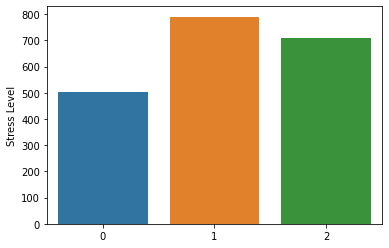

In [16]:
sns.barplot(x = dist.index, y = dist)

In [19]:
df.corr()

,Humidity,Temperature,Step count,Stress Level
Humidity,1.000000,0.507305,-0.051919,0.906246
Temperature,0.507305,1.000000,0.016726,0.479528
Step count,-0.051919,0.016726,1.000000,0.020261
Stress Level,0.906246,0.479528,0.020261,1.000000


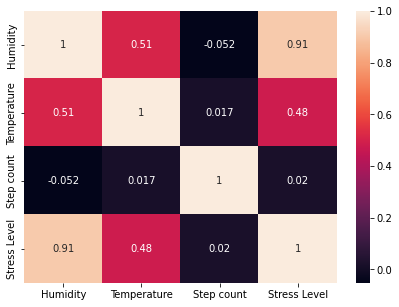

In [20]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(), annot = True)

In [22]:
high_corr = df.corr().abs()
high_corr.unstack().sort_values(ascending = False)[5:10]

Stress Level  Humidity        0.906246
Humidity      Temperature     0.507305
Temperature   Humidity        0.507305
              Stress Level    0.479528
Stress Level  Temperature     0.479528
dtype: float64

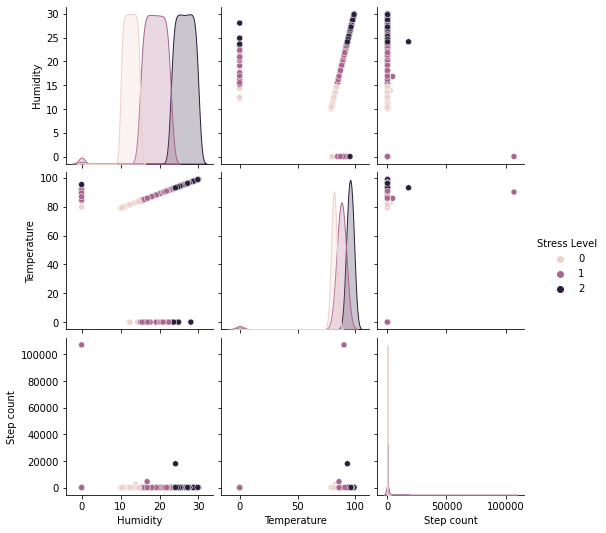

In [24]:
sns.pairplot(data = df[['Stress Level','Humidity','Temperature','Step count']], hue = 'Stress Level')

###2.4 División de los datos en Train, Validación y Test

In [25]:
df.shape

(2001, 4)

In [27]:
test = df.iloc[0:200,:]
df_ = df.iloc[-1801:]
df_

,Humidity,Temperature,Step count,Stress Level
200,14.59,83.59,4.0,0
201,14.77,83.77,22.0,0
202,14.07,83.07,43.0,0
203,11.09,80.09,18.0,0
204,10.52,79.52,52.0,0
...,...,...,...,...
1996,21.82,90.82,96.0,1
1997,10.45,79.45,45.0,0
1998,27.22,96.22,135.0,2
1999,12.46,81.46,64.0,0


In [28]:
df_.head()

,Humidity,Temperature,Step count,Stress Level
200,14.59,83.59,4.0,0
201,14.77,83.77,22.0,0
202,14.07,83.07,43.0,0
203,11.09,80.09,18.0,0
204,10.52,79.52,52.0,0


In [29]:
X = df_.iloc[:,0:3]

In [30]:
X.head()

,Humidity,Temperature,Step count
200,14.59,83.59,4.0
201,14.77,83.77,22.0
202,14.07,83.07,43.0
203,11.09,80.09,18.0
204,10.52,79.52,52.0


In [31]:
y = df_['Stress Level']

In [32]:
y.head()

200    0
201    0
202    0
203    0
204    0
Name: Stress Level, dtype: int64

In [33]:
y = pd.get_dummies(y)[2]

In [34]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = 0, test_size = 0.3)

##3.- Preparamos el modelo

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)

KNeighborsClassifier()

##4.- Evaluacion del modelo

In [37]:
print('Score Train', knn.score(X_train, y_train))
print('Score Validation', knn.score(X_valid, y_valid))
print('Score Test', knn.score(test.iloc[:,0:3], pd.get_dummies(test['Stress Level'])[2]))

Score Train 0.9984126984126984
Score Validation 1.0
Score Test 0.99


##5.- Realizamos algunas predicciones

In [38]:
knn.predict(test.iloc[:,0:3])

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0], dtype=uint8)